# Importing File

In [ ]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa

path = "/content/sample-000000.mp3"

sample, sample_rate=librosa.load(path)
ipd.Audio(path)

FileNotFoundError: ignored

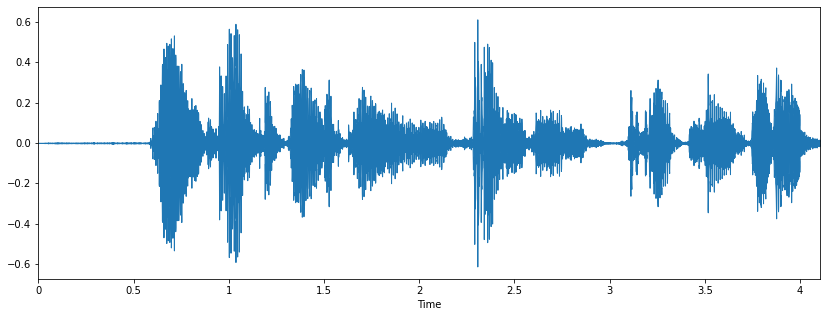

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(sample, sr=sample_rate)

# **Emphasising**

preEmphasis, smaller frequency to higher from y(t)=x(t)−αx(t−1


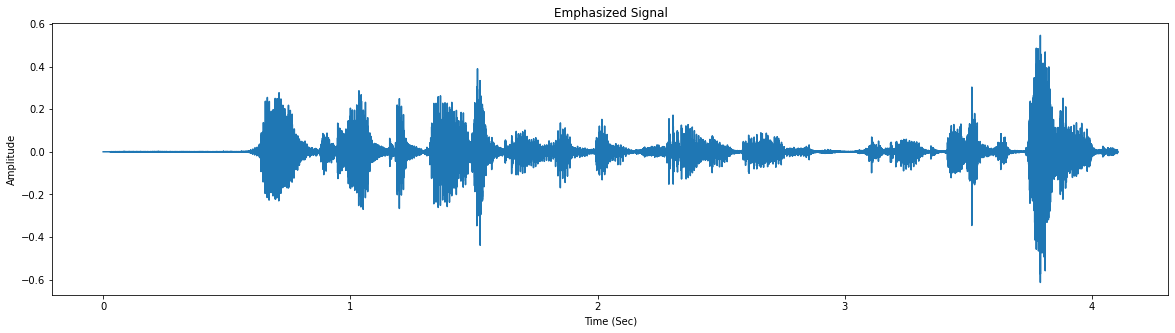

In [ ]:
pre_emphasis = 1
emphasized_signal = np.append(sample[0], sample[1:] - pre_emphasis * sample[:-1])
Time=np.linspace(0, len(emphasized_signal)/sample_rate, num=len(emphasized_signal))

plt.figure(figsize=(20,5))
plt.plot(Time,emphasized_signal)
plt.title('Emphasized Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

In [ ]:
ipd.Audio(emphasized_signal, rate=sample_rate)

# Remove silence


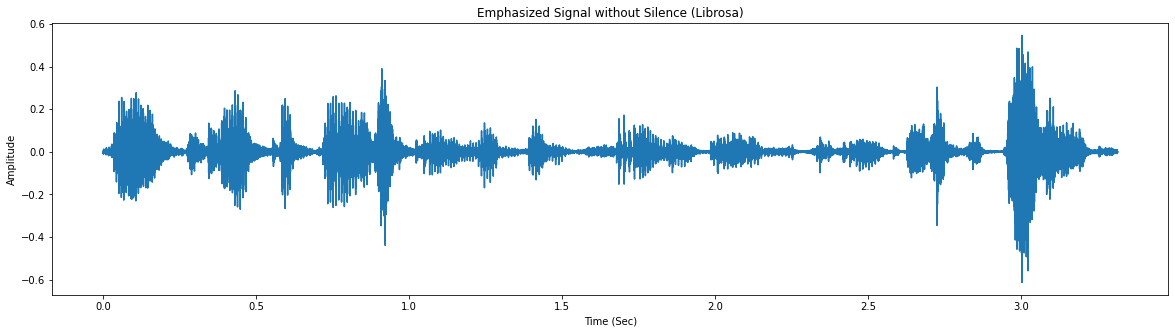

In [ ]:
y = librosa.effects.split(emphasized_signal,top_db=30)
l = []
for i in y:
    l.append( emphasized_signal[i[0]:i[1]] )
emphasized_signal = np.concatenate(l,axis=0)

Time=np.linspace(0, len(emphasized_signal)/sample_rate, num=len(emphasized_signal))

plt.figure(figsize=(20,5))
plt.plot(Time,emphasized_signal)
plt.title('Emphasized Signal without Silence (Librosa)')
plt.ylabel('Amplitude')
plt.xlabel('Time (Sec)')
plt.show()

In [ ]:
ipd.Audio(emphasized_signal, rate=sample_rate)

## Saving into Wav

In [ ]:
librosa.output.write_wav('/content/filtered.wav', emphasized_signal, sample_rate, norm=False)

In [ ]:
!pip install pydub

# Divide into Chunks

In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
sound_file = AudioSegment.from_wav("/content/filtered.wav")
audio_chunks = split_on_silence(sound_file, min_silence_len=40, silence_thresh=-40) 
os.mkdir('/content/chunks') 

for i, chunk in enumerate(audio_chunks):
   out_file = "chunks/chunk{0}.mp3".format(i)
   print("exporting", out_file)
   chunk.export(out_file, format="mp3")

exporting chunks/chunk0.mp3
exporting chunks/chunk1.mp3
exporting chunks/chunk2.mp3
exporting chunks/chunk3.mp3
exporting chunks/chunk4.mp3
exporting chunks/chunk5.mp3
exporting chunks/chunk6.mp3
exporting chunks/chunk7.mp3
exporting chunks/chunk8.mp3
exporting chunks/chunk9.mp3
exporting chunks/chunk10.mp3
exporting chunks/chunk11.mp3
exporting chunks/chunk12.mp3


# load files into List

In [ ]:
import IPython.display as ipd

sound_files = []
chunks = os.listdir('/content/chunks')
for chunk in chunks:
  chunk = f'/content/chunks/{chunk}'
  print(chunk)
  sound_files.append(ipd.Audio(chunk))

/content/chunks/chunk8.mp3
/content/chunks/chunk11.mp3
/content/chunks/chunk6.mp3
/content/chunks/chunk9.mp3
/content/chunks/chunk4.mp3
/content/chunks/chunk12.mp3
/content/chunks/chunk0.mp3
/content/chunks/chunk7.mp3
/content/chunks/chunk3.mp3
/content/chunks/chunk2.mp3
/content/chunks/chunk1.mp3
/content/chunks/chunk5.mp3
/content/chunks/chunk10.mp3


In [ ]:
sound_files[2]

In [ ]:

import shutil

shutil.rmtree('/content/chunks')

In [ ]:
import pandas as pd

pd = pd.read_json('intents1.json', orient='index')